# R Workshop - Davis Data Science Club
## Date: 10/25/2023




## R Basics

**Vectors**: 1D data structure. Stores elements of same type.

Syntax:
vec <- c(item_1, item_2, ...)

**Dataframes**: 2D data structure. Collection of two or more series with common indices. Think of it as a list of vectors of equal length. Or even simpler, think of it as a spreadsheet

Syntax:
df <- data.frame(vector_1, vector_2, ...)

**Operators (<- vs =)**
<- : function assigning values on right side to left side
= : can also do the same thing, also used to define arguments.

In R, good practice to use <-

R is a 1-indexed. 1st element in an array starts at index 1, not index 0 like most other programming languages




In [ ]:
# Ways to create an R DataFrame
# Method 1: create each vector first, pass them in to data.frame()

# Vector creation
qbs <- c("Tom Brady", "Peyton Manning", "Russell Wilson")
receivers <- c("Rob Gronkowski", "Marvin Harrison", "Tyler Lockett")
tds <- c(105, 114, 45)

# Pass all necessary vectors into a dataframe
nfl_1 <- data.frame(qbs, receivers, tds)

# vector names become dataframe column names.
nfl_1

# Method 2: provide all vectors directly
nfl_2 <- data.frame(ranking=1:3,
                    players = c("Charles Woodson", "Ed Reed", "Deion Sanders"),
                    interceptions = as.integer(c(65, 64, 53) )
                    )
nfl_2


qbs,receivers,tds
<chr>,<chr>,<dbl>
Tom Brady,Rob Gronkowski,105
Peyton Manning,Marvin Harrison,114
Russell Wilson,Tyler Lockett,45


ranking,players,interceptions
<int>,<chr>,<int>
1,Charles Woodson,65
2,Ed Reed,64
3,Deion Sanders,53


## Read in Data

In [ ]:
# FEV data: data on study on the effects of smoking in children

# read_table() : Read whitespace-separated columns into a dataframe
s <- read.table("/content/Fev.txt")
head(s, n=20)

# 2 ways to read in .csv file
#df <- read.csv("//content/Fev.csv") uncomment

#df_2 <- read.table("//content/Fev.csv", header = TRUE, sep = ",") uncomment
# sep indicates a string specifying what is separating the data. Default is " "
# mark header as TRUE when first row includes variable names. Default is False.

# Other import methods
# df_stata <- read.dta("Fev.dta")   # Stata

# install.packages("readxl")        # Excel
# library(readxl)
# df_xlsx <- read_excel("Fev.xlsx")

,V1,V2,V3,V4,V5,V6,V7
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,1,301,9,1.708,57.0,2,2
2,2,451,8,1.724,67.5,2,2
3,3,501,7,1.720,54.5,2,2
4,4,642,9,18.000,53.0,1,2
5,5,901,9,1.895,57.0,1,2
6,6,1701,8,2.336,61.0,2,2
7,7,1752,6,1.919,58.0,2,2
8,8,1753,6,1.415,56.0,2,2
9,9,1901,8,1.987,58.5,2,2


## Data Exploration

In [ ]:
# print out entire dataframe
# s

# print out first 6 rows of dataframe
# head(s)

# print out first n rows of dataframe
# head(s, n = 10)

# print out last n rows of dataframe
# tail(s, n = 5)

# generate statistical summary of dataframe
summary(s)

       V1               V2              V3             V4        
 Min.   :  1.00   Min.   :  301   Min.   :3.00   Min.   :-5.000  
 1st Qu.: 50.75   1st Qu.:11231   1st Qu.:6.00   1st Qu.: 1.650  
 Median :100.50   Median :23647   Median :8.00   Median : 1.970  
 Mean   :100.50   Mean   :23430   Mean   :7.47   Mean   : 2.135  
 3rd Qu.:150.25   3rd Qu.:36001   3rd Qu.:9.00   3rd Qu.: 2.362  
 Max.   :200.00   Max.   :46642   Max.   :9.00   Max.   :18.000  
                                                                 
       V5              V6              V7       
 Min.   :46.50   Min.   :1.000   Min.   :1.000  
 1st Qu.:53.50   1st Qu.:1.000   1st Qu.:2.000  
 Median :57.50   Median :1.000   Median :2.000  
 Mean   :56.99   Mean   :1.465   Mean   :1.995  
 3rd Qu.:60.00   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :69.00   Max.   :2.000   Max.   :2.000  
 NA's   :8                                      

In [ ]:
# get length of dataframe
len = nrow(s)
cat("There are", len, "rows in the FEV dataframe")

# view column names
colnames(s)



There are 200 rows in the FEV dataframe

[1] "V1" "V2" "V3" "V4" "V5" "V6" "V7"

### Description of Each Column

| Column   | Description                                       |
|:---------:|:------------------------------------------------:|
| SEQNBR   | Case number                                       |
| SUBJID   | Subject identification number                    |
| AGE      | Subject age at time of measurement (years)       |
| FEV      | Measured FEV (Forced Expiratory Volume - liters per second) |
| HEIGHT   | Subject height at time of measurement (inches)  |
| SEX      | Subject sex (1 = male, 2 = female)               |
| SMOKE    | Smoking habits (1 = yes, 2 = no)                 |


In [ ]:
# Method to rename all column names
colnames(s) <- (c("Case_number", "Subj_ID","Age", "Fev", "Height", "Sex", "Smoke"))
colnames(s)

# Rename specific columns
# colnames(s)[1] <- "new_column_name" # replace 1 with desired column index
head(s)

[1] "Case_number" "Subj_ID"     "Age"         "Fev"         "Height"     
[6] "Sex"         "Smoke"

,Case_number,Subj_ID,Age,Fev,Height,Sex,Smoke
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,1,301,9,1.708,57.0,2,2
2,2,451,8,1.724,67.5,2,2
3,3,501,7,1.720,54.5,2,2
4,4,642,9,18.000,53.0,1,2
5,5,901,9,1.895,57.0,1,2
6,6,1701,8,2.336,61.0,2,2


## Data Cleansing

Good data scientists pay attention to the following aspects:
* Empty cells in any of the columns (Age, Height, Smoke, etc)
* Outliers
* Duplicate rows
* Inconsistent Data Types in a column
* Inconsisent Data Format in a column (ex. Dates: 10/25/2023 vs. Oct 25, 2023)
* Invalid data in context of dataset (ex: specific time range, etc)
* Irrelevant Columns  
  
Any others you can think of?

We won't delve into all of these aspects today, but it's important to keep them in mind when performing data cleaning.

In [ ]:
# Count total missing values
#cat("Total missing values:", sum(is.na(s)))

# Get location of missing values
which(is.na(s))

# Create logical dataframe (False means non-null)
head(is.na(s),20)

[1] 818 848 880 906 922 940 975 991

Case_number,Subj_ID,Age,Fev,Height,Sex,Smoke
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [ ]:
# return row numbers of null elements in the Height column
which(is.na(s$Height))

# edit value at specific point of dataset (eiteher using big number or row number + Column)

[1]  18  48  80 106 122 140 175 191

When to drop rows or fill with mean/median?

drop rows --> large data set

mean --> small data set and when data distribution is normal

median --> small data set and when data is skewed

In [ ]:
s$Height[is.na(s$Height)]<-median(s$Height,na.rm=TRUE)
which(is.na(s))
#na.omit(s)

integer(0)

## Data Manipulation + Visualizations

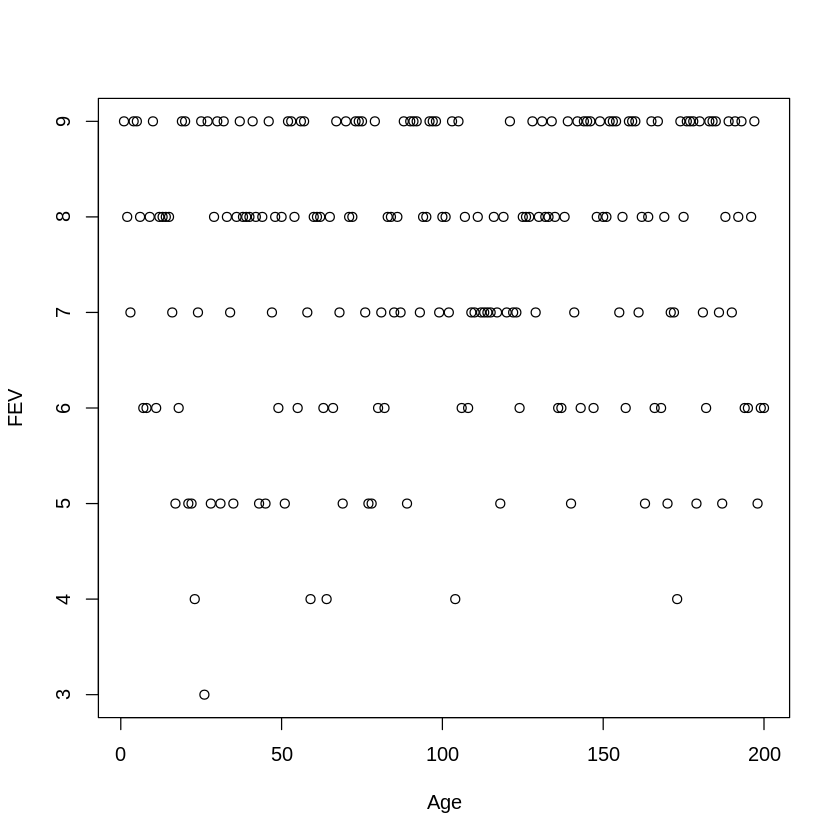

In [ ]:
#Plot Fev against Age
plot(x=s$Age, y=s$FEV, xlab="Age", ylab="FEV")

Lower Outlier Bound = Q1 - 1.5*IQR

Upper Outlier Bound = Q3 + 1.5*IQR

IQR = Q3 - Q1

In [ ]:
# Get Q1, Q3 and IQR for our bounds

summary(s$Fev)
first<-summary(s$Fev)[2]
third<-summary(s$Fev)[5]

IQR <- IQR(s$Fev)

Lower <- first - 1.5*IQR
Upper <- third + 1.5*IQR
Lower
Upper

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -5.000   1.650   1.970   2.135   2.362  18.000 

 1st Qu. 
0.580625 

 3rd Qu. 
3.431625 

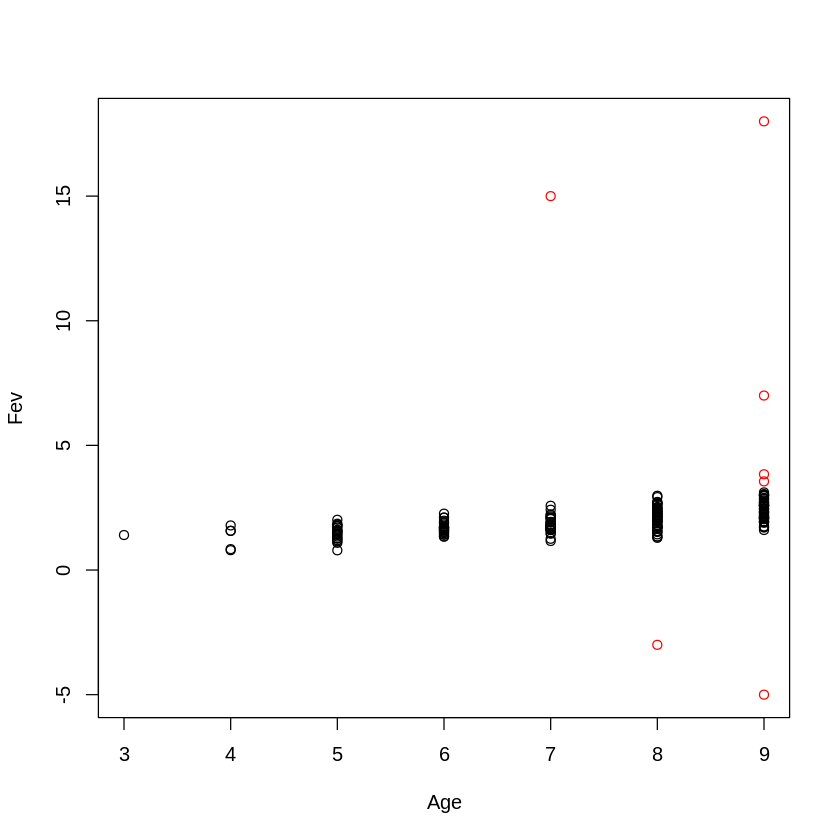

In [ ]:
#Highlight the outliers

plot(x=s$Age, y=s$Fev, xlab="Age", ylab="Fev", col=ifelse(s$Fev>Upper | s$Fev <Lower, "red", "black"))

In [ ]:
# Subsetting the data to get rid of the outliers

news <- subset(s, s$Fev > Lower & s$Fev < Upper)

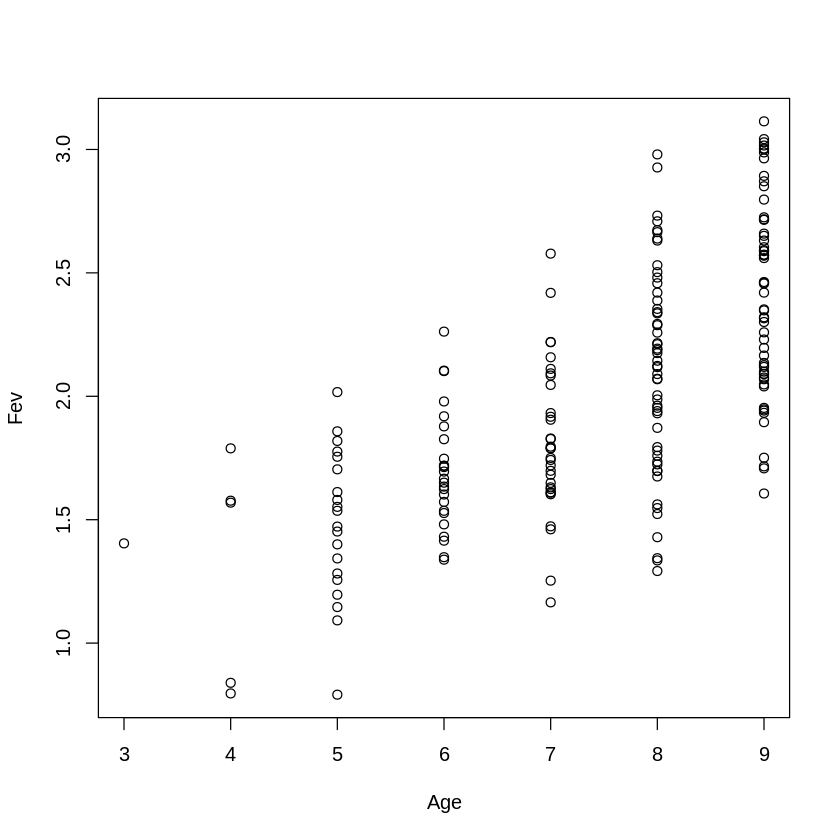

In [ ]:
plot(x=news$Age, y=news$Fev,xlab="Age", ylab="Fev")

How do we graph ages only over 6?

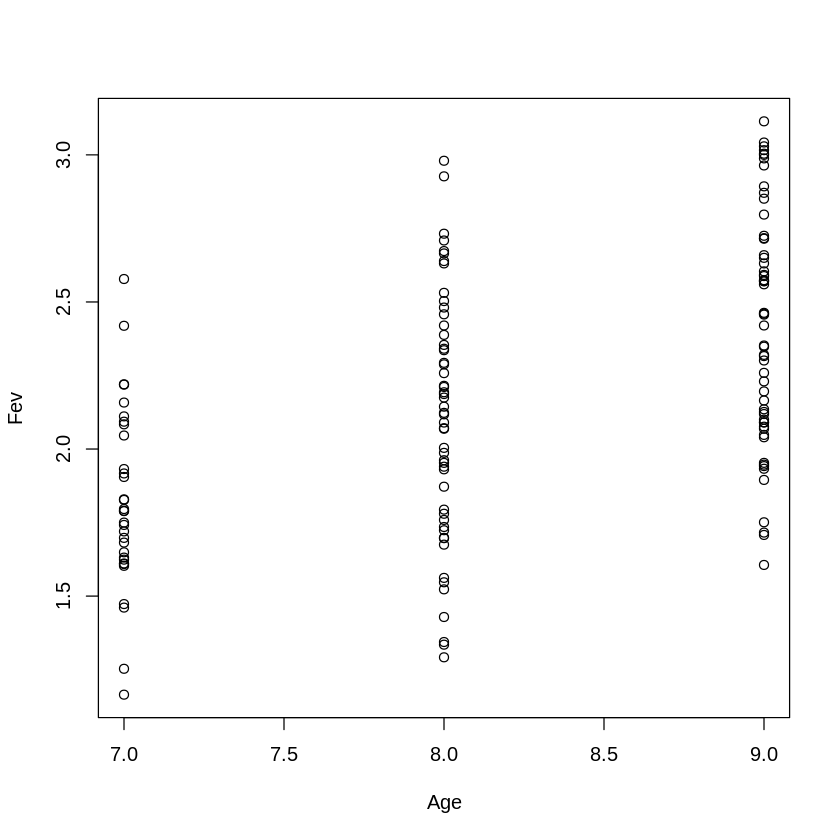

In [ ]:
newsm<-news[news$Age>6,]
plot(x=newsm$Age, y=newsm$Fev,xlab="Age", ylab="Fev")

## ggplot2

In [ ]:
install.packages("tidyverse")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ggplot(data = … , mapping = aes(...)) +
geom_point()

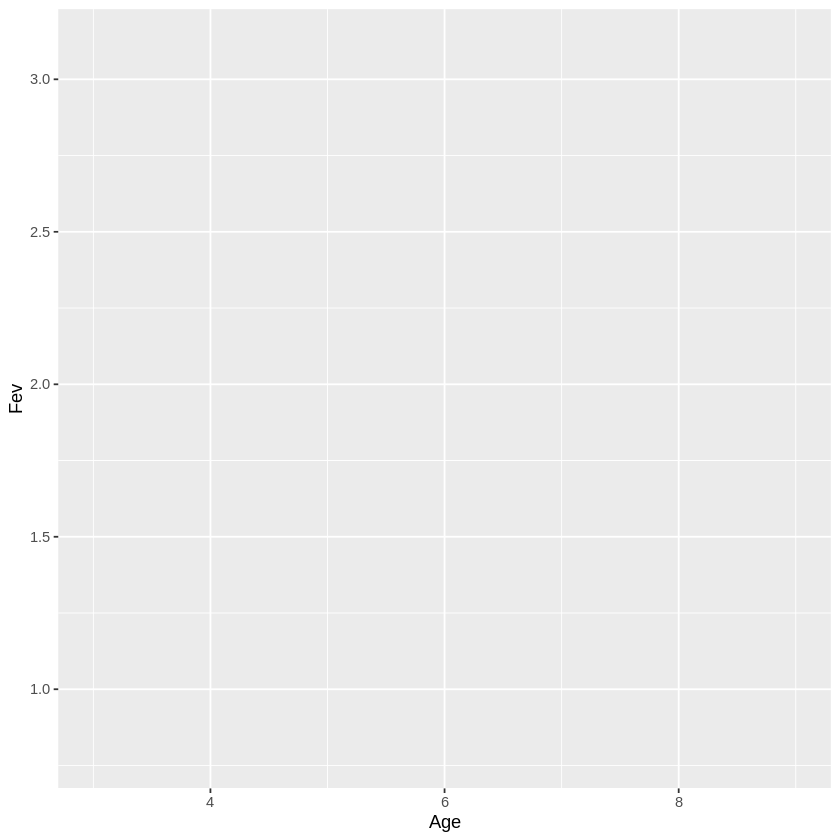

In [ ]:
ggplot(data = news, mapping = aes(x = Age, y = Fev)) + geom_point(alpha = 0, color = "black")

## Your Turn!

Spend the next 10-15 minutes and try to solve the questions below in groups of 2-4 using the 'california_housing_test.csv' dataset under the sample_data folder:

1. What is the length of the dataset? How many null values are there?
2. Rename the 'median_house_value' column to 'median_house_val'  
3. Add a column to the housing dataframe which specifies the average number of rooms in each household. Name the column 'rooms_per_household'.   
4. Find the longitude and latitude associated with the largest value found in the 'total_bedrooms' column. Can you print the entire row?
5. Using ggplot2 or the R plot function, create a scatterplot displaying the median income against the population for only median ages over 25



[1] 3000
Total missing values: 0

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-122.05,37.37,27,3885,661,1537,606,6.6085,344700
2,-118.30,34.26,43,1510,310,809,277,3.5990,176500
3,-117.81,33.78,27,3589,507,1484,495,5.7934,270500
4,-118.36,33.82,28,67,15,49,11,6.1359,330000
5,-119.67,36.33,19,1241,244,850,237,2.9375,81700
6,-119.56,36.51,37,1018,213,663,204,1.6635,67000


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_val,rooms_per_household
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-122.05,37.37,27,3885,661,1537,606,6.6085,344700,6.410891
2,-118.30,34.26,43,1510,310,809,277,3.5990,176500,5.451264
3,-117.81,33.78,27,3589,507,1484,495,5.7934,270500,7.250505
4,-118.36,33.82,28,67,15,49,11,6.1359,330000,6.090909
5,-119.67,36.33,19,1241,244,850,237,2.9375,81700,5.236287
6,-119.56,36.51,37,1018,213,663,204,1.6635,67000,4.990196


     longitude latitude
1564   -118.44    33.98
     longitude latitude housing_median_age total_rooms total_bedrooms
1564   -118.44    33.98                 21       18132           5419
     population households median_income median_house_val rooms_per_household
1564       7431       4930        5.3359           500001             3.67789


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_val,rooms_per_household
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-122.05,37.37,27,3885,661,1537,606,6.6085,344700,6.410891
2,-118.30,34.26,43,1510,310,809,277,3.5990,176500,5.451264
3,-117.81,33.78,27,3589,507,1484,495,5.7934,270500,7.250505
4,-118.36,33.82,28,67,15,49,11,6.1359,330000,6.090909
6,-119.56,36.51,37,1018,213,663,204,1.6635,67000,4.990196
7,-121.43,38.63,43,1009,225,604,218,1.6641,67000,4.628440


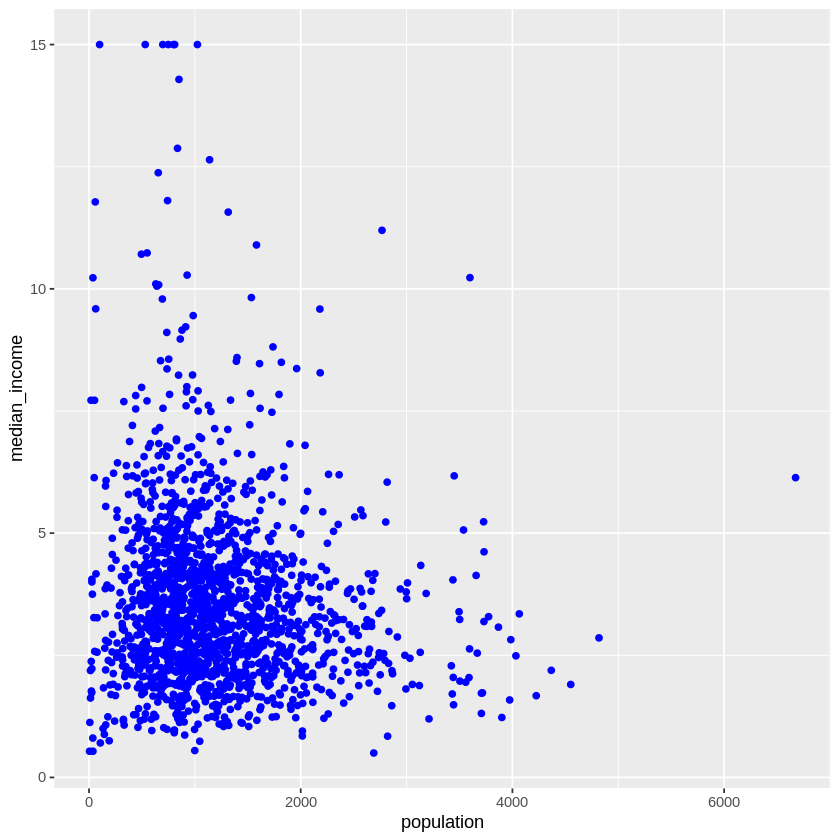

In [ ]:
housing = read.csv("//content/sample_data/california_housing_test.csv")

# Solutions

# Q1
print(nrow(housing))
cat("Total missing values:", sum(is.na(housing)))

# Q2
colnames(housing)[9] <- "median_house_val"
head(housing)

# Q3
housing$rooms_per_household <- housing$total_rooms / housing$households
head(housing)

# Q4
# Find the row index with the most total_bedrooms
largestNumBedroomsRow <- which.max(housing$total_bedrooms)

# Print the location (method 1)
# cat("Longitude:", housing$longitude[largestNumBedroomsRow], "\n")
# cat("Latitude:", housing$latitude[largestNumBedroomsRow], "\n")

# Print the location (method 2)
print(housing[largestNumBedroomsRow, 1:2])

# Print entire row
# trailing comma specifies to select all columns
print(housing[largestNumBedroomsRow, ])

# Q5
#Subset data first for ages over 25
house25<-housing[housing$housing_median_age>25,]
head(house25)
#ggplot2
ggplot(data = house25, mapping = aes(x =  population, y = median_income)) + geom_point(alpha = 1, color = "blue")

#plot in R
#plot(x =  house25$population, y = house25$median_income, xlab="Population", ylab= "Median Age")

##Regression

Here are some commands to use for linear regression:

Plotting a regression model and a line of best fit


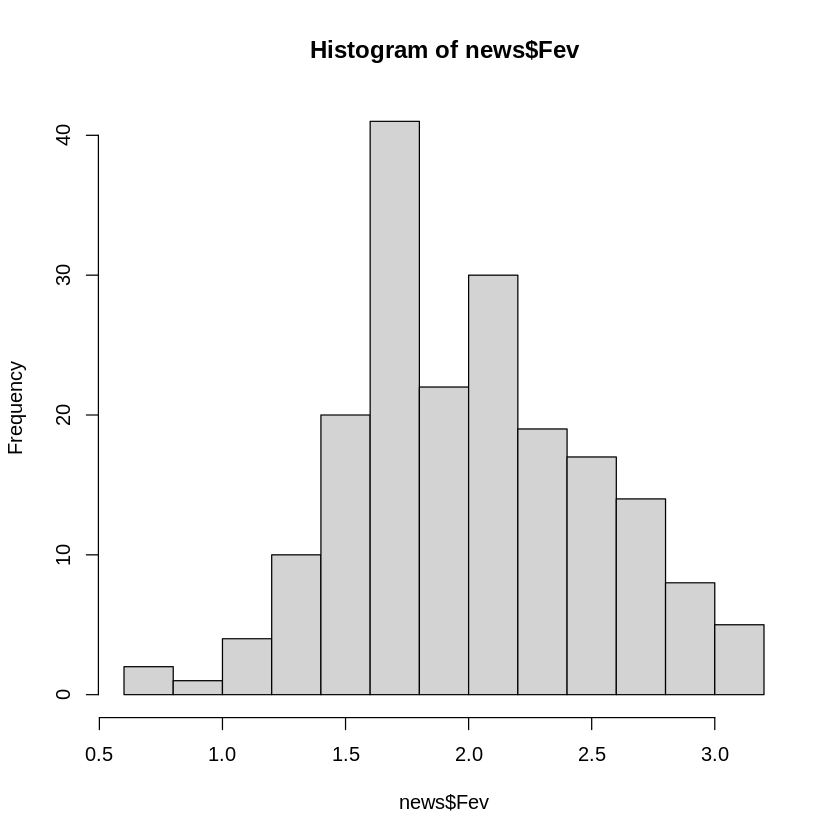

In [ ]:
hist(news$Fev) #Check normality


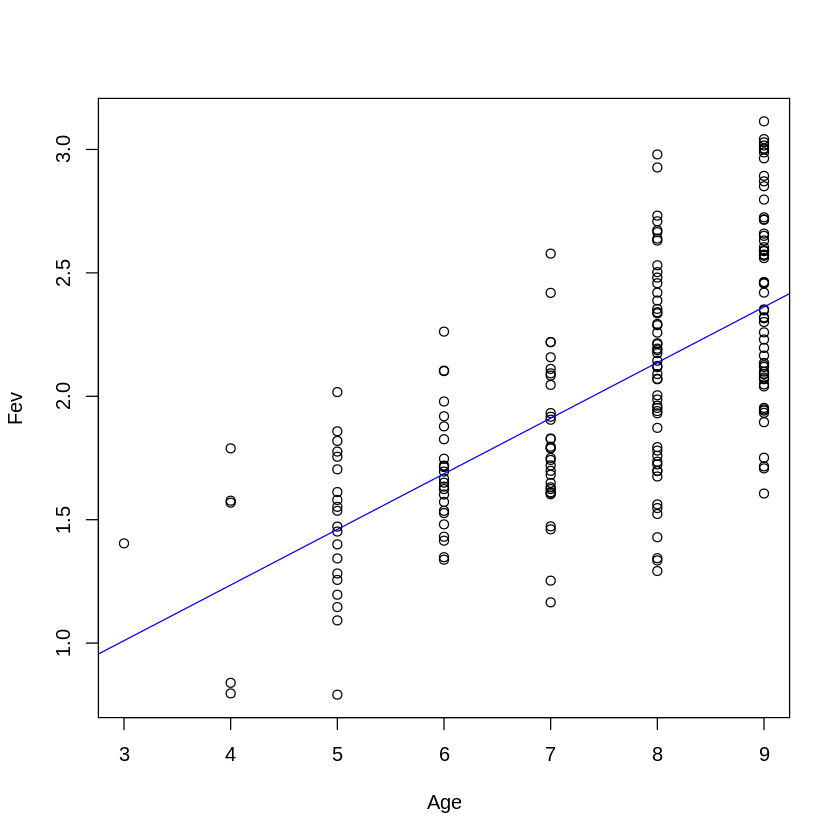

In [ ]:
plot(x=news$Age, y=news$Fev,xlab="Age", ylab="Fev")
reg <- lm(Fev ~ Age, data= news) #Creating our linear regression model #The y variable should be before the tilde
abline(reg,col="blue") #Plotting the line of best fit

In [ ]:
summary(reg) # Shows coefficients, residuals info, and R-squared


Call:
lm(formula = Fev ~ Age, data = news)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84466 -0.26460 -0.01366  0.25134  0.84334 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.33385    0.13624    2.45   0.0152 *  
Age          0.22535    0.01799   12.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3649 on 191 degrees of freedom
Multiple R-squared:  0.4509,	Adjusted R-squared:  0.4481 
F-statistic: 156.9 on 1 and 191 DF,  p-value: < 2.2e-16


In [ ]:
cor(news$Age, news$Fev) #Look at correlation between variables

[1] 0.6715187

[More information on these plots](https://www.statology.org/residuals-vs-leverage-plot/) ⬇

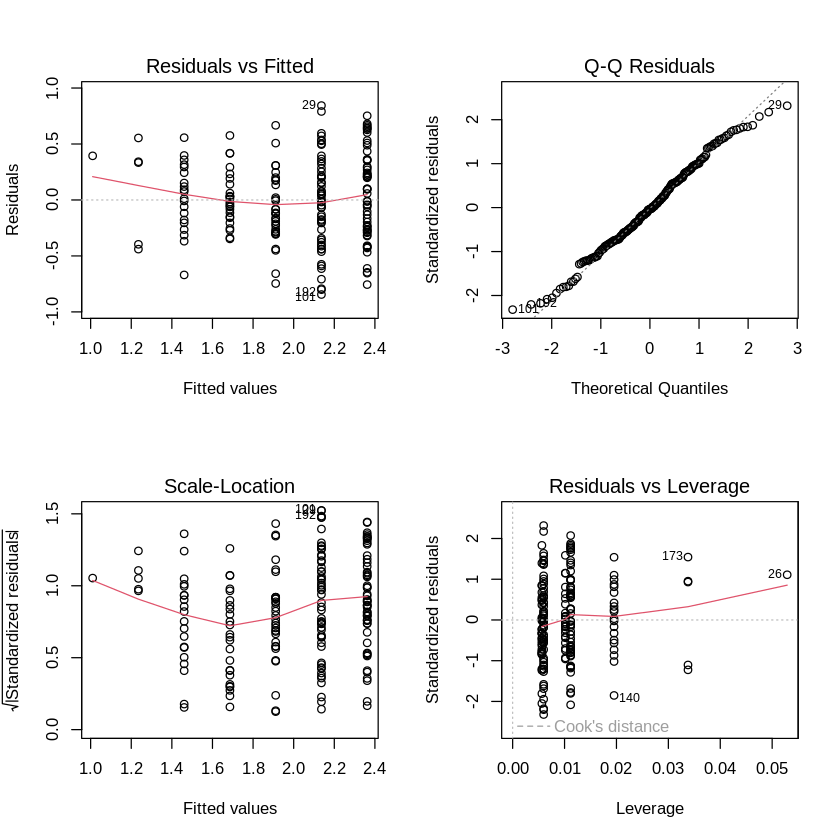

In [ ]:
#Plots for the elements of the linear regression model
par(mfrow=c(2,2))
plot(reg)
#Check how much the data points waver from the red line to see the variance of the residuals
#The Q-Q plot tells us if the linear model is a good fit based on how straight the line is
